In [5]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
%matplotlib inline

from pathlib import Path
import pandas as pd


import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                             f1_score, balanced_accuracy_score,
                             mean_absolute_error, mean_squared_error, r2_score)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

cluster.ipynb utils.py


In [9]:
import pandas as pd

PROJECT_ROOT_DIR = "/Users/aselawijeratne/Documents/Projects/Gon_lab/170610_probes/ml_analysis"

data = pd.read_table(PROJECT_ROOT_DIR + "/data/170609_align_stat.txt")


In [10]:

# Where to save the figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [11]:
data.head()

,OGS,sub_rate,Avg_record,align_len,No_seq,recovery,meanGC
0,EOG706BF5,0.284188,271.811321,468,53,high,40.823230
1,EOG7096P7,0.168367,333.777778,588,9,low,36.529772
2,EOG7096PV,0.212454,244.811321,546,53,high,32.840919
3,EOG70D2WK,0.248205,496.780000,975,50,high,41.144147
4,EOG70D2X1,0.292517,212.788462,294,52,high,38.134922


In [13]:
data_MX = data.iloc[:, [1, 2, 3, 5, 6]].to_numpy()

In [15]:
print("sub rate low")
print(np.min(data_MX[data_MX[:, 3] == "high", 0]))

print("sub rate high")
print(np.max(data_MX[data_MX[:, 3] == "high", 0]))

sub rate low
0.0858143607706
sub rate high
0.482721382289


In [17]:
print("min average record")
print(np.min(data_MX[data_MX[:, 3] == "high", 1]))

print("max average record")
print(np.max(data_MX[data_MX[:, 3] == "high", 1]))


min average record
4.8
max average record
1326.9245283


In [18]:
print("min alignment length")
print(np.min(data_MX[data_MX[:, 3] == "high", 2]))

print("max alignment length")
print(np.max(data_MX[data_MX[:, 3] == "high", 2]))

min alignment length
225
max alignment length
1923


In [19]:
print("min GC content")
print(np.min(data_MX[data_MX[:, 3] == "high", 4]))

print("max GC content")
print(np.max(data_MX[data_MX[:, 3] == "high", 4]))

min GC content
30.8625454788269
max GC content
50.7054047823809


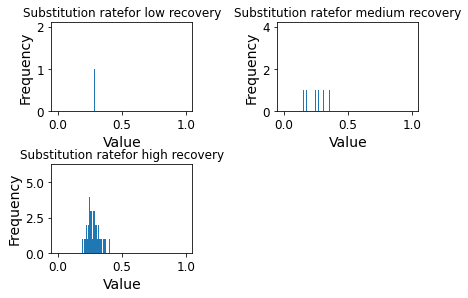

In [21]:
sub_bins = np.arange(0, 1, 0.001) # fixed bin size
#plt.hist(data_MX[:, 0], bins = sub_bins)
main_title = "Substitution rate"
X_label = "Value"
y_label = "Frequency"
#plt.show()


#plt.hist(merged_clusters_raw_MX[merged_clusters_raw_MX[:, 0] == 2][:, 4], bins = sub_bins, alpha=0.2, label='Before pruning')

#plot with various axes scales
plt.figure(1)

# 
plt.subplot(221)
plt.hist(data_MX[data_MX[:, 3] == "low"][:, 0], 
         bins = sub_bins)
plt.xlabel(X_label)
plt.ylabel(y_label)
plt.title(main_title + "for low recovery" )


plt.subplot(222)
plt.hist(data_MX[data_MX[:, 3] == "medium"][:, 0], 
         bins = sub_bins)
plt.xlabel(X_label)
plt.ylabel(y_label)
plt.title(main_title + "for medium recovery" )



plt.subplot(223)
plt.hist(data_MX[data_MX[:, 3] == "high"][:, 0], 
         bins = sub_bins)
plt.xlabel(X_label)
plt.ylabel(y_label)
plt.title(main_title + "for high recovery" )

# logit


# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.6)

plt.show()

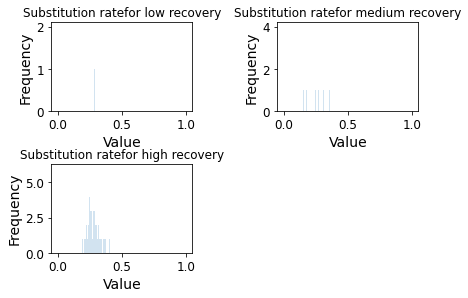

In [22]:
sub_bins = np.arange(0, 1, 0.001) # fixed bin size
#plt.hist(data_MX[:, 0], bins = sub_bins)
main_title = "Substitution rate"
X_label = "Value"
y_label = "Frequency"
#plt.show()


#plt.hist(merged_clusters_raw_MX[merged_clusters_raw_MX[:, 0] == 2][:, 4], bins = sub_bins, alpha=0.2, label='Before pruning')

#plot with various axes scales
plt.figure(1)

# 
plt.subplot(221)
plt.hist(data_MX[data_MX[:, 3] == "low"][:, 0], 
         bins = sub_bins, alpha=0.2)
plt.xlabel(X_label)
plt.ylabel(y_label)
plt.title(main_title + "for low recovery" )


plt.subplot(222)
plt.hist(data_MX[data_MX[:, 3] == "medium"][:, 0], 
         bins = sub_bins, alpha=0.2)
plt.xlabel(X_label)
plt.ylabel(y_label)
plt.title(main_title + "for medium recovery" )



plt.subplot(223)
plt.hist(data_MX[data_MX[:, 3] == "high"][:, 0], 
         bins = sub_bins, alpha=0.2)
plt.xlabel(X_label)
plt.ylabel(y_label)
plt.title(main_title + "for high recovery" )

# logit


# Format the minor tick labels of the y-axis into empty strings with
# `NullFormatter`, to avoid cumbering the axis with too many labels.
#plt.gca().yaxis.set_minor_formatter(NullFormatter())
# Adjust the subplot layout, because the logit one may take more space
# than usual, due to y-tick labels like "1 - 10^{-3}"
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.6)

plt.show()

In [23]:
cluster=data[['sub_rate', 'Avg_record', 'align_len', 'meanGC']]

In [25]:
# standardize clustering variables to have mean=0 and sd=1


clustervar = cluster.copy()

# z-score standardization
clustervar['sub_rate'] = preprocessing.scale(clustervar['sub_rate'].astype('float64'))

# robust scaling (use .fit_transform)
clustervar['Avg_record'] = preprocessing.RobustScaler().fit_transform(
    clustervar[['Avg_record']].astype('float64')
)

clustervar['align_len'] = preprocessing.RobustScaler().fit_transform(
    clustervar[['align_len']].astype('float64')
)

#clustervar['No_seq'] = preprocessing.scale(clustervar['No_seq'].astype('float64'))

clustervar['meanGC'] = preprocessing.RobustScaler().fit_transform(
    clustervar[['meanGC']].astype('float64')
)


In [26]:
clustervar.head()

,sub_rate,Avg_record,align_len,meanGC
0,0.281925,-0.455490,-0.542348,0.160628
1,-1.786379,-0.214620,-0.185736,-0.735868
2,-0.999084,-0.560442,-0.310550,-1.506120
3,-0.360651,0.418985,0.964339,0.227637
4,0.430662,-0.684917,-1.059435,-0.400705


In [29]:
# split data into train and test sets

clus_train, clus_test = train_test_split(clustervar, test_size=.3, random_state=123)


In [32]:
import numpy as np
from scipy.cluster.vq import kmeans2
from scipy.spatial.distance import cdist

Xtrain = clus_train.select_dtypes(include=[np.number]).to_numpy()  # numeric only
clusters = range(1, 10)
meandist = []

for k in clusters:
    # '++' = k-means++ init; increase iter if needed
    centers, labels = kmeans2(Xtrain, k, minit='++', iter=50)
    dists = np.min(cdist(Xtrain, centers, metric='euclidean'), axis=1)
    meandist.append(dists.mean())

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

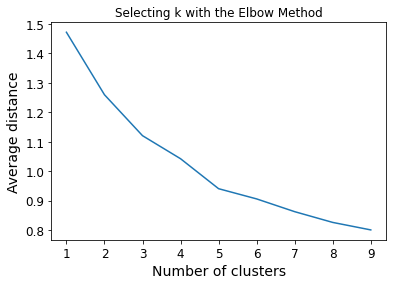

In [33]:
"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""

plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method')


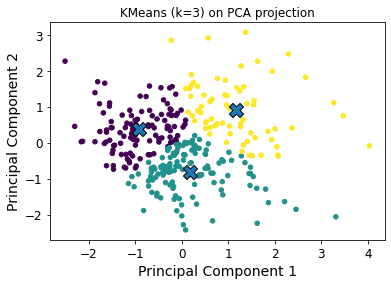

Silhouette score (k=3): 0.242


In [36]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Interpret 3 cluster solution
# numeric-only matrix
Xtrain = clus_train.select_dtypes(include=[np.number]).to_numpy()

# k-means (k=3)
k = 3
km = KMeans(n_clusters=k, random_state=42, n_init=10)
km.fit(Xtrain)
labels = km.labels_

# 2D PCA for visualization
pca = PCA(n_components=2, random_state=42)
X2 = pca.fit_transform(Xtrain)
centers2 = pca.transform(km.cluster_centers_)

# plot points + projected centroids
plt.scatter(X2[:, 0], X2[:, 1], c=labels, s=20)
plt.scatter(centers2[:, 0], centers2[:, 1], marker='X', s=200, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans (k=3) on PCA projection')
plt.show()

# quality metric
sil = silhouette_score(Xtrain, labels, metric='euclidean')
print(f"Silhouette score (k=3): {sil:.3f}")

In [37]:
from sklearn.metrics import silhouette_score

scores = {}
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(Xtrain)
    scores[k] = silhouette_score(Xtrain, km.labels_)
print(scores)


{2: 0.27841818185959627, 3: 0.24176444677694583, 4: 0.2501774167725589, 5: 0.26349549315775794, 6: 0.242520627537663}


In [ ]:
###The best separation occurs at k=2, but even then, the clustering quality is weak.

###Moving to k=3–6 does not improve structure; scores remain around 0.24–0.26.

###This suggests the dataset may not have strong natural partitions in the feature space.


In [38]:
# create a unique identifier variable from the index for the 
# cluster training data to merge with the cluster assignment variable
clus_train.reset_index(level=0, inplace=True)
# create a list that has the new index variable
cluslist=list(clus_train['index'])
# create a list of cluster assignments
labels=list(model3.labels_)
# combine index variable list with cluster assignment list into a dictionary
newlist=dict(zip(cluslist, labels))
newlist
# convert newlist dictionary to a dataframe
newclus=DataFrame.from_dict(newlist, orient='index')
newclus
# rename the cluster assignment column
newclus.columns = ['cluster']

In [39]:
# now do the same for the cluster assignment variable
# create a unique identifier variable from the index for the 
# cluster assignment dataframe 
# to merge with cluster training data
newclus.reset_index(level=0, inplace=True)
# merge the cluster assignment dataframe with the cluster training variable dataframe
# by the index variable
merged_train=pd.merge(clus_train, newclus, on='index')
merged_train.head(n=100)
# cluster frequencies
merged_train.cluster.value_counts()

cluster
0    127
1    113
2     69
Name: count, dtype: int64

In [40]:
"""
END multiple steps to merge cluster assignment with clustering variables to examine
cluster variable means by cluster
"""

# FINALLY calculate clustering variable means by cluster
clustergrp = merged_train.groupby('cluster').mean()
print ("Clustering variable means by cluster")
print(clustergrp)


Clustering variable means by cluster
              index  sub_rate  Avg_record  align_len    meanGC
cluster                                                       
0        221.881890  0.771753   -0.272677  -0.198933  0.123813
1        220.823009 -0.838022   -0.203924  -0.205354  0.104540
2        217.942029  0.203285    1.091807   1.131490  0.236730


In [41]:
# validate clusters in training data by examining cluster differences in GPA using ANOVA
# first have to merge GPA with clustering variables and cluster assignment data 
num_seq_data=data['No_seq']
# split GPA data into train and test sets
num_seq_data_train, num_seq_data_test = train_test_split(num_seq_data, test_size=.3, random_state=123)
num_seq_data_train1=pd.DataFrame(num_seq_data_train)
num_seq_data_train1.reset_index(level=0, inplace=True)
merged_train_all=pd.merge(num_seq_data_train1, merged_train, on='index')
sub1 = merged_train_all[['No_seq', 'cluster']].dropna()

import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi 

gpamod = smf.ols(formula='No_seq ~ C(cluster)', data=sub1).fit()
print (gpamod.summary())

print ('means for No_seq by cluster')
m1= sub1.groupby('cluster').mean()
print (m1)

print ('standard deviations for No_seq by cluster')
m2= sub1.groupby('cluster').std()
print (m2)

mc1 = multi.MultiComparison(sub1['No_seq'], sub1['cluster'])
res1 = mc1.tukeyhsd()
print(res1.summary())


                            OLS Regression Results                            
Dep. Variable:                 No_seq   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.891
Date:                Sat, 06 Sep 2025   Prob (F-statistic):              0.153
Time:                        10:34:04   Log-Likelihood:                -1134.6
No. Observations:                 309   AIC:                             2275.
Df Residuals:                     306   BIC:                             2286.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.1811      0.848     

In [ ]:
#Cluster membership does not meaningfully predict differences in No_seq. The groups have nearly identical means with overlapping distributions, and both regression and Tukey tests confirm no significant separation

In [5]:
data.head()

,OGS,sub_rate,Avg_record,align_len,No_seq,recovery,meanGC
0,EOG706BF5,0.284188,271.811321,468,53,high,40.823230
1,EOG7096P7,0.168367,333.777778,588,9,low,36.529772
2,EOG7096PV,0.212454,244.811321,546,53,high,32.840919
3,EOG70D2WK,0.248205,496.780000,975,50,high,41.144147
4,EOG70D2X1,0.292517,212.788462,294,52,high,38.134922


In [31]:
data["meanGC"].value_counts()

43.921439    1
41.910932    1
42.406581    1
42.179239    1
42.929319    1
41.986921    1
41.786078    1
40.922077    1
36.920461    1
37.627938    1
44.779488    1
39.767138    1
37.377013    1
36.055481    1
45.180204    1
36.938703    1
45.639837    1
38.041836    1
46.004329    1
40.374461    1
39.098912    1
37.929561    1
38.814345    1
42.227361    1
38.512229    1
46.834102    1
42.111326    1
39.055531    1
37.858705    1
40.568364    1
            ..
39.871942    1
38.971859    1
40.122379    1
49.986365    1
45.220020    1
39.248403    1
40.081641    1
44.799279    1
43.858182    1
45.783878    1
43.733475    1
36.533472    1
42.170969    1
39.728130    1
45.345096    1
44.404566    1
39.838379    1
37.337471    1
37.804770    1
39.268011    1
43.687658    1
37.790572    1
42.817230    1
35.949748    1
39.923345    1
40.461329    1
37.732910    1
39.532151    1
35.785252    1
40.172552    1
Name: meanGC, dtype: int64

In [32]:
data.describe()

,sub_rate,Avg_record,align_len,No_seq,meanGC
count,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.268401,415.564064,693.178733,45.239819,40.556294
std,0.056061,198.292789,248.535451,9.563557,3.519156
min,0.085814,4.800000,225.000000,9.000000,30.862545
25%,0.230563,275.447917,508.750000,41.000000,37.955620
50%,0.267140,388.991328,650.500000,49.000000,40.053957
75%,0.301145,532.709375,845.250000,52.000000,42.744772
max,0.482721,1326.924528,1923.000000,53.000000,50.705405


('Saving figure', 'Mean_GC_vs_Number_of_sequences')


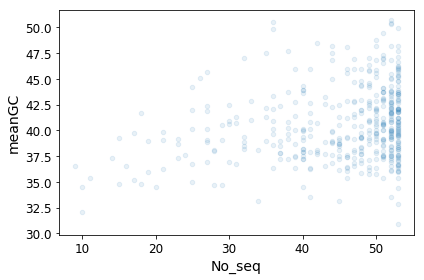

In [41]:
%matplotlib inline
data.plot(kind="scatter", x = "No_seq", 
         y = "meanGC", alpha = 0.1)
save_fig("Mean_GC_vs_Number_of_sequences")

('Saving figure', 'Align_len_vs_Number_of_sequences')


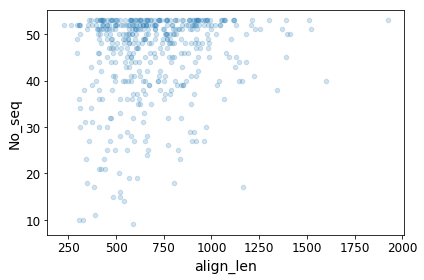

In [45]:
%matplotlib inline
data.plot(kind="scatter", x = "align_len", 
         y = "No_seq", alpha = 0.2)
save_fig("Align_len_vs_Number_of_sequences")

In [46]:
data_cor_matrix = data.corr()

In [47]:
data_cor_matrix["No_seq"].sort_values(ascending = False)

No_seq        1.000000
meanGC        0.239406
align_len     0.171328
Avg_record    0.114928
sub_rate      0.100276
Name: No_seq, dtype: float64

In [ ]:
#All relationships are weak (r < 0.3), meaning No_seq is not strongly explained by any of these variables individually.

#GC content is the most promising predictor, but its effect is limited.

('Saving figure', 'scatter_matrix_plot')


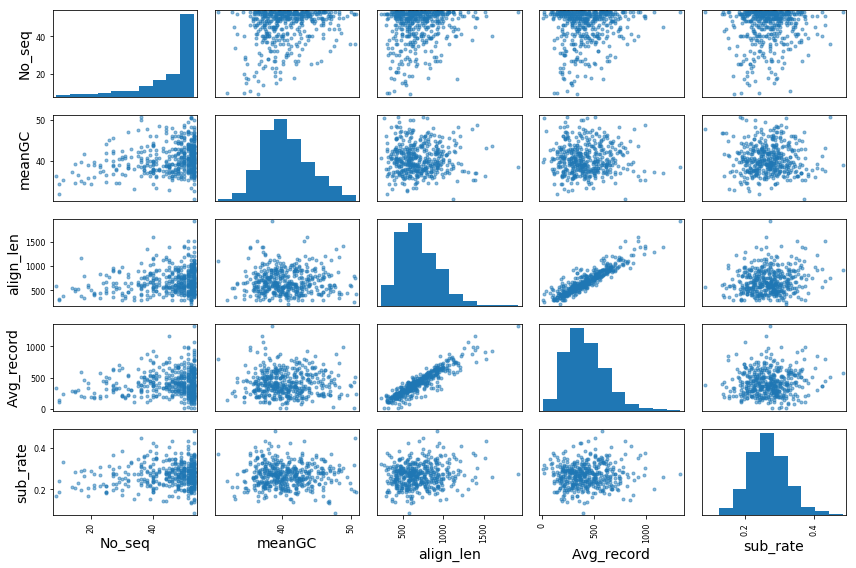

In [48]:
from pandas.tools.plotting import scatter_matrix

attributes = ["No_seq", "meanGC", "align_len",
              "Avg_record", "sub_rate"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [38]:
svm_poly_reg.predict(pred_test)

array([ 49.15409134,  56.78543034,  49.38623696,  49.46623651,
        49.69681138,  49.35038251,  49.71656189,  48.56060471,
        49.59493725,  49.35141883,  49.32506082,  52.19388348,
        49.31188842,  45.91327308,  49.18313893,  52.00702879,
        48.95034411,  49.38140579,  49.67573035,  50.93704224,
        56.60904193,  48.5326682 ,  49.3785289 ,  49.59460518,
        51.88610323,  49.04939218,  48.60085875,  46.70245668,
        49.70119397,  50.65765557,  49.50752535,  49.2879227 ,
        48.89343779,  49.43295   ,  46.55043031,  49.30449547,
        50.21700982,  48.95934786,  51.58143717,  49.36407443,
        49.36792956,  49.35464029,  49.00377527,  50.77895583,
        49.58104245,  48.54656062,  49.01260257,  49.05879884,
        50.63058271,  49.35803222,  48.28770328,  49.18962003,
        49.23928153,  55.90821194,  49.78123519,  59.14436984,
        52.88641703,  51.26042197,  50.10958431,  49.49564325,
        51.03943496,  49.4511437 ,  49.72833379,  49.25

In [45]:
from sklearn.model_selection import train_test_split, StratifiedKFold

RANDOM_STATE = 42  # define first

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# --- features/target ---
# Drop ID column; use numeric predictors
feat_cols = ["sub_rate", "Avg_record", "align_len", "meanGC"]
X = data[feat_cols].copy()
y = data["recovery"].astype("category")   # 'low'/'hig'/'med'

# handle missing rows if any
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

# --- split (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


In [47]:
def report_classification(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    print(f"{name}\nBalanced Acc: {bal_acc:.3f}  |  F1-macro: {f1_macro:.3f}\n")
    print("Per-class report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion matrix (rows=true, cols=pred, normalized):\n", np.round(cm, 3))

In [48]:
# --- Baseline: majority class ---
maj = Counter(y_train).most_common(1)[0][0]
y_maj = np.array([maj] * len(y_test), dtype=object)
print("Majority baseline:",
      "Balanced Acc=", balanced_accuracy_score(y_test, y_maj),
      "F1-macro=", f1_score(y_test, y_maj, average='macro'))


Majority baseline: Balanced Acc= 0.3333333333333333 F1-macro= 0.28632478632478636


In [49]:
# --- KNN (scaled) + CV ---
knn_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('clf', KNeighborsClassifier())
])
knn_param = {
    'clf__n_neighbors': [3,5,7,11,15,21],
    'clf__weights': ['uniform','distance'],
    'clf__metric': ['minkowski','manhattan']
}
knn_gs = GridSearchCV(knn_pipe, knn_param, scoring='f1_macro', cv=cv, n_jobs=-1)
report_classification(knn_gs, "KNN (scaled, tuned)")

# --- Random Forest (class-weighted) + CV ---
rf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=600,
    class_weight='balanced_subsample',
    n_jobs=-1
)
rf_param = {
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 3, 5],
    'max_features': ['sqrt', 0.5]
}
rf_gs = GridSearchCV(rf, rf_param, scoring='f1_macro', cv=cv, n_jobs=-1)
report_classification(rf_gs, "RandomForest (balanced, tuned)")

# --- SVC (scaled) + CV ---
svc_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('clf', SVC(class_weight='balanced', random_state=RANDOM_STATE))
])
svc_param = {
    'clf__kernel': ['rbf'],
    'clf__C': [0.1, 1, 10, 100],
    'clf__gamma': ['scale','auto']
}
svc_gs = GridSearchCV(svc_pipe, svc_param, scoring='f1_macro', cv=cv, n_jobs=-1)
report_classification(svc_gs, "SVC (scaled, balanced, tuned)")

KNN (scaled, tuned)
Balanced Acc: 0.329  |  F1-macro: 0.327

Per-class report:
              precision    recall  f1-score   support

        high      0.754     0.776     0.765        67
         low      0.000     0.000     0.000         3
      medium      0.222     0.211     0.216        19

    accuracy                          0.629        89
   macro avg      0.325     0.329     0.327        89
weighted avg      0.615     0.629     0.622        89

Confusion matrix (rows=true, cols=pred, normalized):
 [[0.776 0.03  0.194]
 [0.667 0.    0.333]
 [0.789 0.    0.211]]
RandomForest (balanced, tuned)
Balanced Acc: 0.536  |  F1-macro: 0.477

Per-class report:
              precision    recall  f1-score   support

        high      0.757     0.836     0.794        67
         low      0.400     0.667     0.500         3
      medium      0.200     0.105     0.138        19

    accuracy                          0.674        89
   macro avg      0.452     0.536     0.477        89
weight

###Comparison of Classifier Performance on recovery



1. KNN (scaled, tuned)

Balanced accuracy: 0.329 (very poor).

Performs reasonably only on the majority class “high” (F1 = 0.765).

Fails completely on “low” and nearly fails on “medium.”

Confirms that KNN is not suitable here — it collapses to the majority class under imbalance.

2. Random Forest (balanced, tuned)

Balanced accuracy: 0.536, macro F1: 0.477 (best so far).

“High”: recall 0.836, precision 0.757 → solid performance.

“Low”: recall 0.667, precision 0.400 → better than KNN/SVC, but sample size is tiny.

“Medium”: recall 0.105, precision 0.200 → weak performance, still misclassified as “high.”

Overall: handles imbalance better than KNN and SVC, but “medium” class remains a challenge.

3. SVC (scaled, balanced, tuned)

Balanced accuracy: 0.459, macro F1: 0.360 (worse than RF).

“High”: recall drops to 0.552.

“Low”: recall 0.667 (caught 2/3), but precision low.

“Medium”: recall 0.158, precision 0.111 → poor.

Overall: fails to balance class trade-offs, worse than Random Forest.

###Use scikit-learn’s Gradient Boosting as it handles imbalance better

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV

# class-balanced weights for training fold
sw = compute_sample_weight(class_weight='balanced', y=y_train)

# allow optional fit kwargs (e.g., sample_weight)
def report_classification(model, name, fit_kwargs=None):
    model.fit(X_train, y_train, **(fit_kwargs or {}))
    y_pred = model.predict(X_test)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred, normalize='true')
    print(f"{name}\nBalanced Acc: {bal_acc:.3f}  |  F1-macro: {f1_macro:.3f}\n")
    print("Per-class report:")
    print(classification_report(y_test, y_pred, digits=3))
    print("Confusion matrix (rows=true, cols=pred, normalized):\n", np.round(cm, 3))

# Gradient Boosting + CV (no scaler)
gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_param = {
    'n_estimators': [200, 400, 600],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [2, 3, 5],
    'subsample': [0.7, 1.0],
    'max_features': [None, 'sqrt']
}

gb_gs = GridSearchCV(
    gb,
    gb_param,
    scoring='f1_macro',
    cv=cv,
    n_jobs=-1
)

# fit with sample weights to address imbalance
report_classification(gb_gs, "GradientBoosting (balanced via sample_weight, tuned)",
                      fit_kwargs={'sample_weight': sw})


GradientBoosting (balanced via sample_weight, tuned)
Balanced Acc: 0.571  |  F1-macro: 0.521

Per-class report:
              precision    recall  f1-score   support

        high      0.789     0.836     0.812        67
         low      0.400     0.667     0.500         3
      medium      0.308     0.211     0.250        19

    accuracy                          0.697        89
   macro avg      0.499     0.571     0.521        89
weighted avg      0.673     0.697     0.681        89

Confusion matrix (rows=true, cols=pred, normalized):
 [[0.836 0.045 0.119]
 [0.    0.667 0.333]
 [0.789 0.    0.211]]
